# Agrupamento de Leis Brasileiras usando TF-IDF e K-Means

Neste notebook, exploramos o agrupamento de leis brasileiras.

Utilizamos o método TF-IDF (Term Frequency-Inverse Document Frequency) para transformar os textos em representações numéricas. Esse método pondera as palavras do documento com base em sua frequência, ajudando a destacar termos importantes.

Posteriormente, usamos o algoritmo K-Means para agrupar os textos. K-Means é um método de clusterização que segmenta os dados em grupos distintos com base em suas características.

## Importando as bibliotecas

In [9]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Preparação dos Dados

Carregamos e preparamos os dados para a clusterização. Também removemos termos irrelevantes para focar nas palavras-chave.

In [12]:
# Carregando os dados
df = pd.read_csv("./data/Leis de Sorocaba (Clean).csv")

# Preenchendo os valores nulos com uma string vazia:
df['summary'] = df['summary'].fillna('')

# Remover termos irrelevantes:
remove_phrases = ['dispor sobre', 'dar outro providência', 'dar outro providencia']
remove_phrases_regex = '|'.join(remove_phrases)
df['summary'] = df['summary'].str.replace(remove_phrases_regex, ' ', regex=True).str.strip()

# Verificando as primeiras linhas do dataframe:
df.head()

,summary
0,denominação José antonio pascoto via público
1,denominação vitor hage via público
2,denominação lisardo cunha dia via público
3,denominação Desirre Ferraz Cardoso via público...
4,instituir calendário oficial município dia soc...


## Representação TF-IDF

Vamos transformar os textos em uma representação numérica usando TF-IDF.

In [30]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['summary'])

## Clusterização com K-Means

Agora, vamos usar o algoritmo K-Means para agrupar os textos.

In [39]:
# Definindo o número de clusters de acordo com os grupos temáticos.
# Este número pode ser ajustado com base em experimentações.
n_clusters = 11
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(X)
df['cluster'] = kmeans.labels_

## Análise dos Clusters

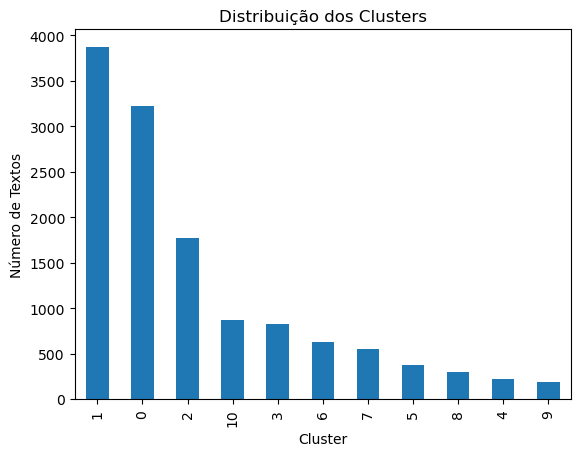

In [40]:
# Visualizando a distribuição dos clusters
df['cluster'].value_counts().plot(kind='bar')
plt.title('Distribuição dos Clusters')
plt.xlabel('Cluster')
plt.ylabel('Número de Textos')
plt.show()

Vamos visualizar os principais termos e documentos em cada cluster.

In [41]:
for i in range(n_clusters):
    print(f"Cluster {i}:\n")
    print(df[df['cluster'] == i]['summary'].head(5))
    print("\n" + "="*50 + "\n")

Cluster 0:

10    obrigatoriedade empresa concessionária fornece...
18    programa serviço fisioterapia domiciliar assis...
19    normatização fornecimento cesta básico aliment...
22    instituição área especial interesse social hab...
26    alteração denominação escola municipal localiz...
Name: summary, dtype: object


Cluster 1:

0          denominação José antonio pascoto via público
1                    denominação vitor hage via público
2             denominação lisardo cunha dia via público
3     denominação Desirre Ferraz Cardoso via público...
28    denominação Benedito Pereira gomes via público...
Name: summary, dtype: object


Cluster 2:

5     alterar redação artigo 7 8 9 10 lei municipal ...
16    alterar redação artigo 2 lei municipal Nº 1271...
32    alterar redação inciso ii artigo 2 lei Nº 9807...
33    alterar artigo 97 lei Nº 5271 TOKEN_DATA   fun...
34    alterar redação artigo 43 lei Nº 8627 TOKEN_DA...
Name: summary, dtype: object


Cluster 3:

11     declarar uti

Para entender melhor cada cluster, identificamos as palavras-chave mais importantes.

In [42]:
def top_terms_per_cluster(X, clusters, n_terms=10):
    df = pd.DataFrame(X.todense()).groupby(clusters).mean()
    for i, r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([vectorizer.get_feature_names_out()[t] for t in np.argsort(r)[-n_terms:]]))

top_terms_per_cluster(X, df['cluster'])


Cluster 0
cargo,rua,concessão,praça,criação,próprio,público,cidade,municipal,denominação

Cluster 1
praça,joão,oliveira,silva,maria,josé,público,cidade,denominação,via

Cluster 2
novo,dar,alteração,revogação,redação,alterar,artigo,nº,token_data,lei

Cluster 3
beneficente,centro,amigo,sociedade,clube,sorocaba,associação,público,declarar,utilidade

Cluster 4
funcionário,sorocaba,público,concessão,câmara,municipal,vencimento,salarial,funcionalismo,reajuste

Cluster 5
sorocaba,governo,executivo,celebração,secretaria,paulo,autorizar,celebrar,estado,convênio

Cluster 6
administrativo,imóvel,poder,executivo,celebrar,convênio,sorocaba,municipal,autorizar,prefeitura

Cluster 7
permuta,direito,real,comum,doação,autorizar,desafetação,bem,uso,imóvel

Cluster 8
estabelecimento,sorocaba,exercício,elaboração,orçamentário,município,diretriz,norma,instalação,estabelecer

Cluster 9
autorizar,abrir,cr,token_valor,autorização,adicional,suplementar,especial,crédito,abertura

Cluster 10
fixo,exercício,âmbi

## Conclusão

Realizamos a clusterização de leis brasileiras usando TF-IDF e K-Means, transformando textos em representações numéricas e agrupando-os em clusters com base em suas características. As palavras-chave de cada cluster fornecem insights sobre os principais temas ou tópicos abordados em cada grupo.
